# Position, Velocity and Acceleration

For a function x(t) that describes the position of the car,
- $velocity$ = $v(t)$ = $\frac{dx(t)}{dt}$ 
- $acceleraton$ = $a(t)$ =  $\frac{dv(t)}{dt}$ 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Set up symbolic variable
t = sp.Symbol('t')
plot_numerical_derivative = True
h = 0.001

In [2]:
def derivative_numerical(f, x_val):
    return (f(x_val + h) - f(x_val)) / h

def slope_numerical(f, x_val):
    a_val = x_val - h
    return (f(x_val)- f(a_val)) / (x_val - a_val)

    
def plot_f_fprime_fprimeprime(f_expr, f_prime_expr, f_prime_prime_expr, x_start, x_stop, n_dots):

    # Convert the sympy expression to numpy function
    f = sp.lambdify(t, f_expr, 'numpy')
    f_prime = sp.lambdify(t, f_prime_expr, 'numpy')
    f_prime_prime = sp.lambdify(t, f_prime_prime_expr, 'numpy')
    
    # Create the input x values
    x_vals = np.linspace(x_start, x_stop, 100)
    # Compute y values of the function
    y_vals = f(x_vals)
    # Compute y' values of the function
    y_prime_vals = f_prime(x_vals)
    # Compute y'' values of the function
    y_prime_prime_vals = f_prime_prime(x_vals)
    
    
    # Plot the function
    plt.figure(figsize=(12, 8))
    plt.plot(x_vals, y_vals, color='blue', label=f'f(x) = {f_expr}')

    # Plot the function's derivative
    plt.plot(x_vals, y_prime_vals, color='green', linestyle='--', label=f"f'(x) = {f_prime_expr}")
    
    # Plot the function's second derivative
    plt.plot(x_vals, y_prime_prime_vals, color='black',  label=f"f''(x) = {f_prime_prime_expr}")
    
    # Calculate and plot numerical derivative or the numerical slope at specified values (red dots)
    x_dots = np.linspace(x_start, x_stop, n_dots)
    for i, x_dot in enumerate(x_dots):
        if (plot_numerical_derivative):
            dot = derivative_numerical(f, x_dot)
        else:
            dot = slope_numerical(f, x_dot)
        # Plot the dot
        plt.plot(x_dot, dot, 'ro', markersize=6)
    
    # Calculate and plot numerical derivative or the numerical slope at specified values (red dots)
    x_dots = np.linspace(x_start, x_stop, n_dots)
    for i, x_dot in enumerate(x_dots):
        if (plot_numerical_derivative):
            dot = derivative_numerical(f_prime, x_dot)
        else:
            dot = slope_numerical(f_prime, x_dot)
        # Plot the dot
        plt.plot(x_dot, dot, 'ko', markersize=6, fillstyle='none', markeredgewidth=1.5)
    
    plt.grid(True, alpha=0.3)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

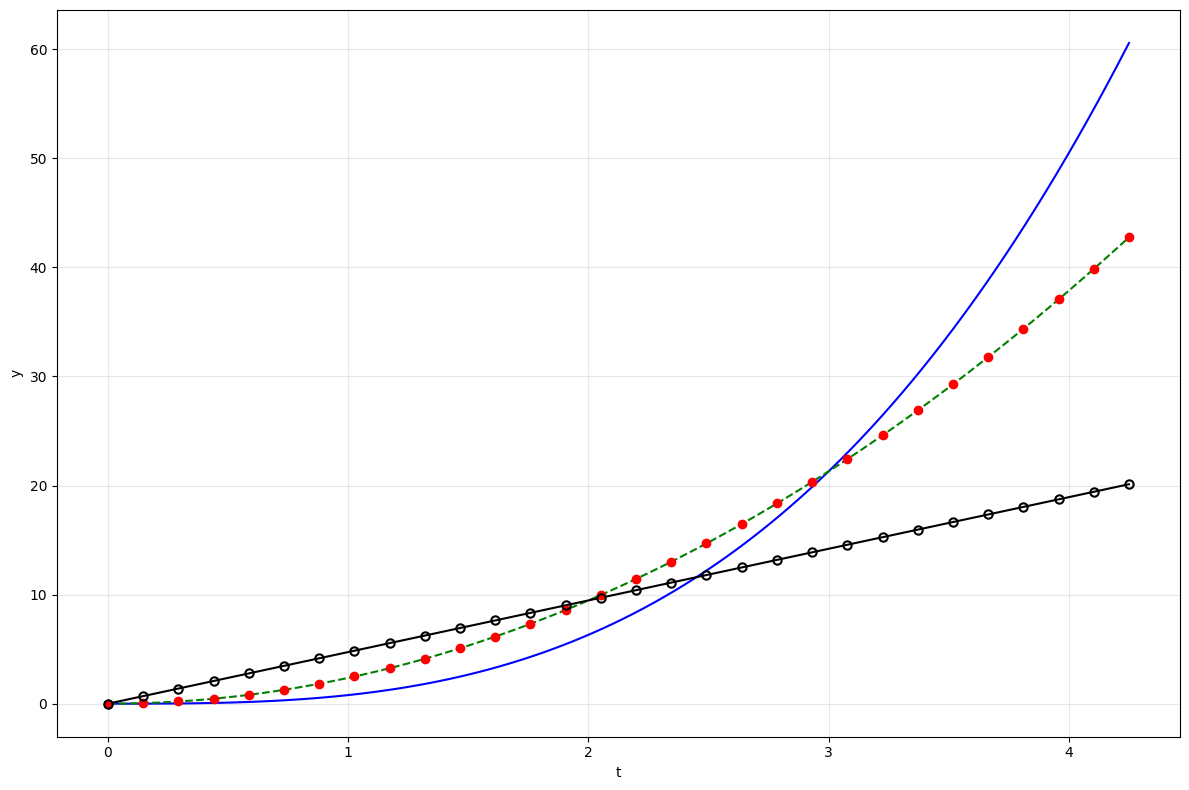

In [3]:
# Combustion Engine
t_start = 0.0
t_stop = 4.25
Vmax = 26.8224  # 60 mph in m/s
k = 34.0
n_dots= 30
f = (Vmax / k) * (t**3)
f_prime = (Vmax /k)* 3*(t**2)
f_prime_prime = (Vmax /k)* 6*t
plot_f_fprime_fprimeprime(f, f_prime, f_prime_prime, t_start, t_stop, n_dots)

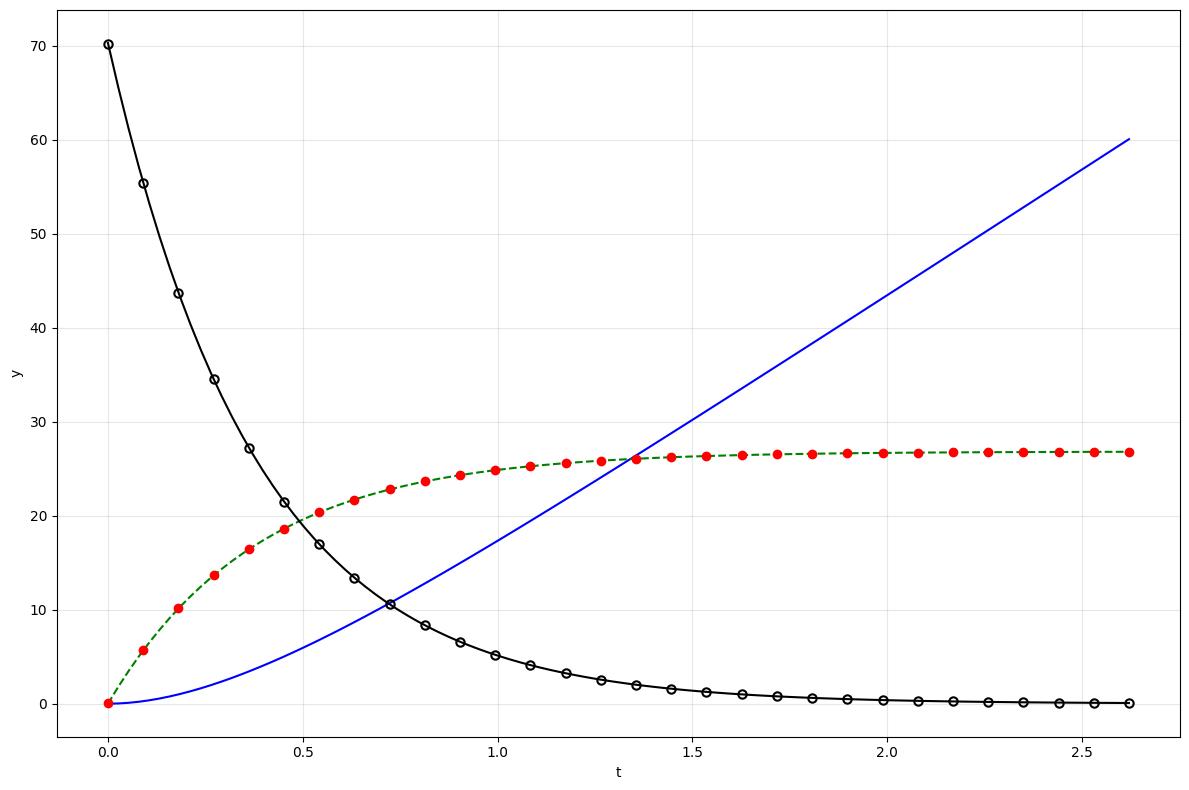

In [5]:
# Tesla in Ludicrous mode
t_start = 0.0
t_stop = 2.62
Vmax = 26.8224  # 60 mph in m/s
k_ludicrous = 2.62
n_dots= 30

f = Vmax * (t +  (sp.exp(-k_ludicrous * t) - 1)/k_ludicrous)
f_prime = Vmax * (1 - sp.exp(-k_ludicrous * t))
f_prime_prime = Vmax * (k_ludicrous*sp.exp(-k_ludicrous * t))
plot_f_fprime_fprimeprime(f, f_prime, f_prime_prime, t_start, t_stop, n_dots)

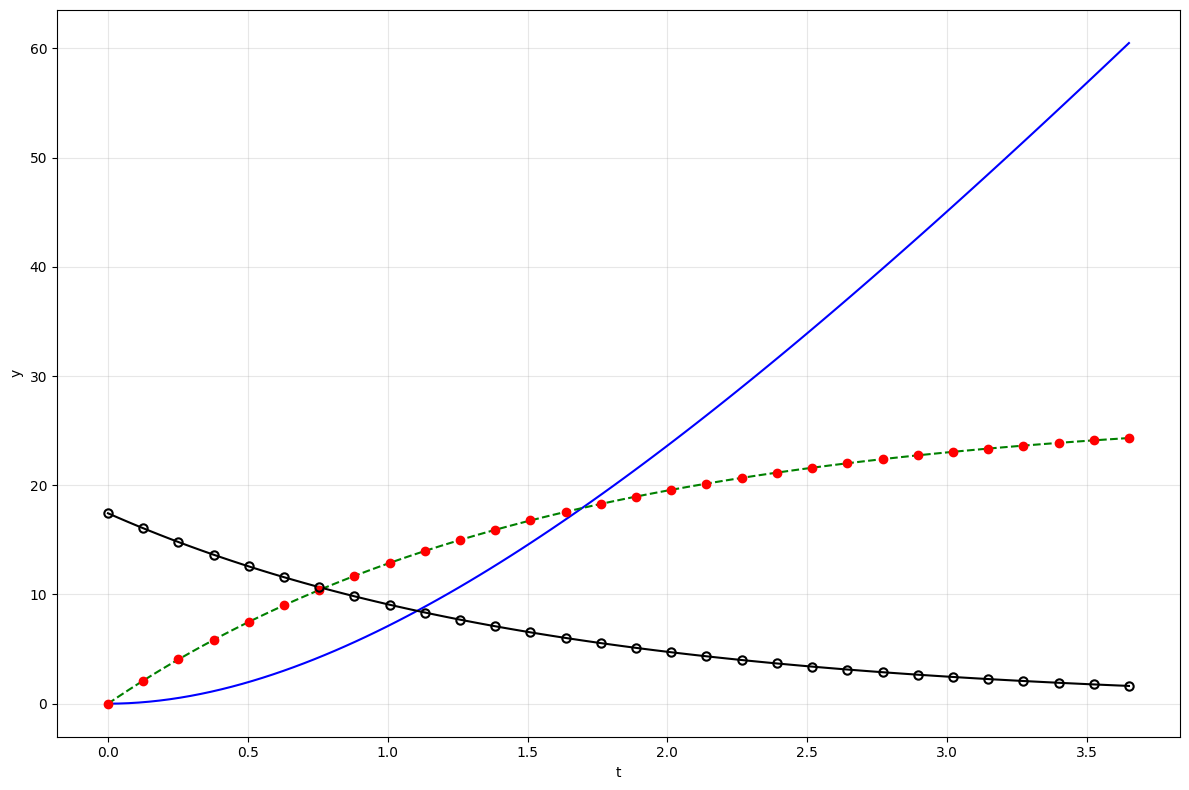

In [6]:
# Tesla on chill mode

t_start = 0.0
t_stop = 3.65
Vmax = 26.8224  # 60 mph in m/s
k_chill = 0.65

f = Vmax * (t - (1/k_chill) * (1 - sp.exp(-k_chill * t)))
f_prime = Vmax * (1 - sp.exp(-k_chill * t))
f_prime_prime = Vmax * k_chill*sp.exp(-k_chill * t)
plot_f_fprime_fprimeprime(f, f_prime, f_prime_prime, t_start, t_stop, n_dots)